# Credit Borrower Classification

## The HMEQ data set

Our data set, called the  "Home Equity" or , in brief, HMEQ data set, is provided by www.creditriskanalytics.net. It comprises  information about a set of borrowers, which are categorized along demographic variables and variables concerning their business relationship with the lender. A binary target variable called 'BAD' is  provided and indicates whether a borrower has repaid her/his debt. You can think of the data as a standard use case of binary classification.

You obtain the data, together with other interesting finance data sets, directly from www.creditriskanalytics.net. The website also provides a brief description of the data set. Specifically, the data set consists of 5,960 observations and 13 features including the target variable. The variables are defined as follows:

- BAD: the target variable, 1=default; 0=non-default 
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

As you can see, the features aim at describing the financial situation of a borrower. It makes sense to familiarize yourself with the above features. Make sure you understand what type of information they provide and what this information might reveal about the risk of defaulting.  

---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# You have to update the code such that the variable file includes the correct path to the csv file on your computer
file = '/work/hmeq.csv'
df_raw = pd.read_csv(file)

df= df_raw.copy()

In [ ]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


# Mission

The final objective is to build a classifier that can distinguish good from bad borrowers. 
To do that, the following tasks need to be accomplished:
1. Understand the content that is available in the dataset. Spend soem time on Explanatory data analysis (EDA).
2. Pre-process the data. Careful you will find missing values as well as different data types (categorical and numerical). 

3. NN model

    a. Build a NN classifier to classify the borrowers based on the available borrower information. 
    
    b. Analyze the outcomes.

4. Benchmark: ML models

    a. Build a benchmark model, such as LR, SVM, RF to compare the NN performance

    b. Report the top 5 most predictive features based on RF feature importance and or interpret the LR coefficients to get some interpretability and understand which features were most predictive

    c. Analyze the outcomes.

6. Use the different packages of visualization to visualize findings from both approaches.
7. Compare the results from all models by using the appropriate measures. Think about which measures are important for this task, AUC, F1, Recall or Sensitivity? Justify your choice. Eventually do some Post Processing

# Explanatory Data Analysis

In [ ]:
df.duplicated().value_counts()  # there are no duplicates in the data set

False    5960
dtype: int64

In [ ]:
df["BAD"].value_counts()   # the data set is imbalanced, i.e. there are 4 times less 'BAD' data points than 'NOT BAD's

0    4771
1    1189
Name: BAD, dtype: int64

## Data exploration

There are numerous `NaN` entries in the dataset.

We would like to deal with them by removing the data-points that contain more than 2 `NaN` values in the array of the features.

In [ ]:
# there are missing values in the most columns!!!
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
df.isna().any(axis=1,).sum()  # it gives the number of rows in which there are NaNs

2596

In [ ]:
# create a series indexed by the original row indices having the number of nans as values, sorted in descending order
s_nans = df.isna().sum(axis=1).sort_values(ascending=False)
s_nans

3       11
1405    11
1959    10
2303    10
1897    10
        ..
2710     0
2711     0
2712     0
2713     0
5959     0
Length: 5960, dtype: int64

In [ ]:
# let's see how many rows have a greater number of NaNs than a threshold. Do it in a loop with threshold values running from 0..10
# after that we can decide if we drop some of that rows from the data set 

for i in range (11):
    idx = list(s_nans[s_nans.values>i].index.values)
    print(f"number of rows having more NaNs than {i}: ",len(idx))

number of rows having more NaNs than 0:  2596
number of rows having more NaNs than 1:  1007
number of rows having more NaNs than 2:  558
number of rows having more NaNs than 3:  339
number of rows having more NaNs than 4:  275
number of rows having more NaNs than 5:  192
number of rows having more NaNs than 6:  126
number of rows having more NaNs than 7:  101
number of rows having more NaNs than 8:  62
number of rows having more NaNs than 9:  13
number of rows having more NaNs than 10:  2


In [ ]:
# let's say we drop all rows with more than 3 NaNs - there are 339 such rows
# create list with indices of those rows

indices_nan2 = list(s_nans[s_nans.values>3].index.values)
indices_nan2[0:10], len(indices_nan2)

df_ = df.drop(index=indices_nan2, axis=0)

We have effectively removed all data-points that contained more than three missing values among the features.

Now we'll take more sensible care for the rest of the data points, i.e. we will fill the missing values.

In [ ]:
# there are still NaNs but at most 3 NaNs per row

df_.isna().sum()

BAD           0
LOAN          0
MORTDUE     343
VALUE        84
REASON      138
JOB         127
YOJ         327
DEROG       415
DELINQ      265
CLAGE        72
NINQ        199
CLNO          0
DEBTINC    1174
dtype: int64

In [ ]:
# The ratio of BAD values (0.252) remained almost the same (0.249) after dropping out the rows.
# We can go on with it.
df_['BAD'].value_counts()

0    4496
1    1125
Name: BAD, dtype: int64

Now as we removed the sparse rows, we will fill the rest of the gaps in missing data with following assumptions:
  1. `MORTDUE` missing values may be all 0's (just not entered in the data set) rather than a sloppiness during data collection. This assumption based on the fact that the least entered value is > 2000 and on the distribution of the data.
  2. `VALUE` missing values may be all 0's (just not entered in the data set) rather than a sloppiness during data collection. This assumption based on the facts that the least entered value is > 8000 and the target value for all those cases is 'BAD'.

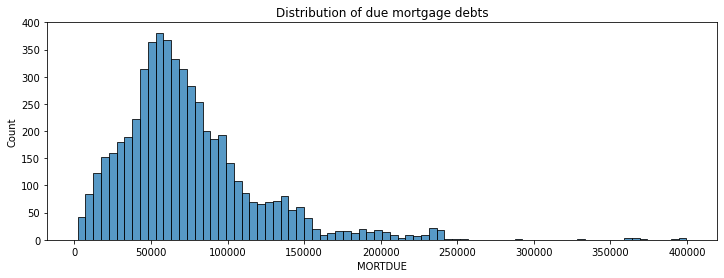

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(data=df, x="MORTDUE", ax=ax)
ax.set_title("Distribution of due mortgage debts")
plt.show()

# Observe that there are NO entries that have NO mortgage.
# We know that there are 343 borrowers with MORTDUE = NaN.
# The assumption is these have 0 mortgage debt.

In [ ]:
# The smallest MORTDUE value is 2063, so we suppose all the NaNs mean no due mortgage (MORTDUE = 0)
df["MORTDUE"].min()

2063.0

In [ ]:
# What is the BAD value for all the people with VALUE = NaN?
df[df["VALUE"].isna()]["BAD"].value_counts()

# 105 people with VALUE = NaN ended in default (Bad debt)
# 7 people with VALUE = NaN paid their debts

1    105
0      7
Name: BAD, dtype: int64

In [ ]:
# Smallest VALUE value is 8000
df["VALUE"].min()

8000.0

<AxesSubplot:>

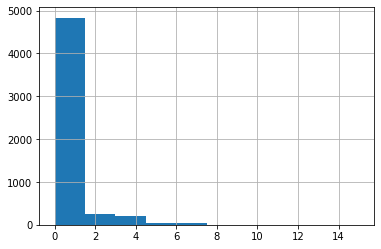

In [ ]:
df["DELINQ"].hist()

In [ ]:
df["DELINQ"].median()

0.0

<AxesSubplot:>

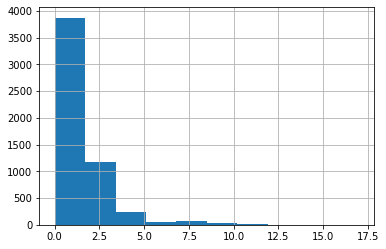

In [ ]:
df["NINQ"].hist()

In [ ]:
df["NINQ"].median()

1.0

<AxesSubplot:>

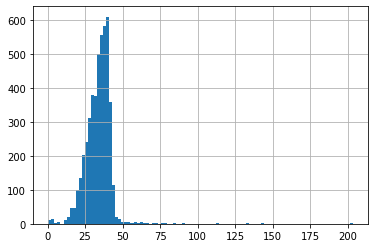

In [ ]:
df["DEBTINC"].hist(bins=100)

In [ ]:
df["DEBTINC"].median()

34.818261819

In [ ]:
#df[df["MORTDUE"]<=30000]["MORTDUE"]
df[df["VALUE"]<=30000]["VALUE"]

2       16700.0
11      29800.0
24      17180.0
27      20200.0
39      20300.0
         ...   
4284    22399.0
4334    24811.0
4563    26500.0
4649    28900.0
5223    29512.0
Name: VALUE, Length: 105, dtype: float64

<AxesSubplot:>

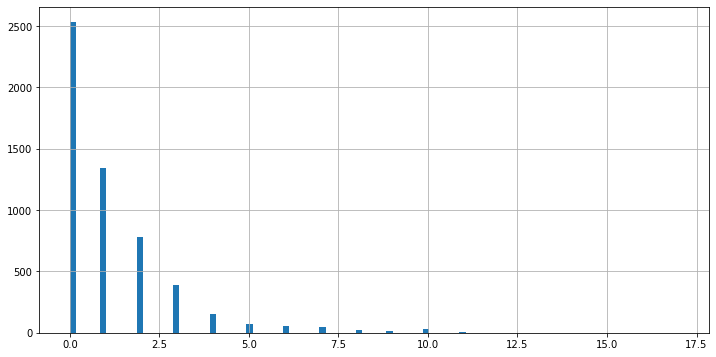

In [ ]:
feat = 'NINQ'
df[feat].hist(bins=100, figsize=(12,6))  # data set has missing values
#df1[feat].hist(bins=100, figsize=(12,6))

## Data Preprocessing

### Creating data transformation function

Following code implements a function that would transform an entry pandas DataFrame into the form
that is ready for `train_test_split`:

In [ ]:
# This thing does all the DATA CLEANING
def clean_data(df, nan_threshold=2):

    features_to_unknown = ["REASON", "JOB"]
    features_to_zero    = ["MORTDUE", "VALUE", "DEROG", "DELINQ", "CLNO"]
    features_to_median  = ["YOJ", "NINQ", "DEBTINC"]

    # Some info upfront:
    print(f"Input DataFrame shape ... {df.shape}")

    # First create a copy of the dataframe
    print(f"Making a copy of the dataframe ... ", end="")
    df_out = df.copy()
    print(f"done.")


    # Counting all NaNs by columns:
    print(f"Removing all rows having > {nan_threshold} NaN values in them... ", end="")
    
    # s_nans  = series that contains indices and counts of NaNs in that particular row
    # nan_idx = list of indices of all rows having more than <nan_threshold> NaNs in them
    s_nans = df.isna().sum(axis=1)
    nan_idx = list(s_nans[s_nans.values>nan_threshold].index.values)

    # Dropping all rows using the `nan_idx` list
    df_out.drop(index=nan_idx, axis=0, inplace=True)
    print(f"done.")
    print(f"Number of rows dropped... {len(nan_idx)}.")

    # Check:
    print(f"Resulting DataFrame shape ... {df_out.shape}")

    # Filling NaNs for categorical features:
    for feature in features_to_unknown:
        print(f"Filling {df_out[feature].isna().sum()} values in feature [{feature}] with \"Unknown\" ... ", end="")
        df_out[feature].fillna("Unknown", inplace=True)
        print(f"done.")

    # Filling NaNs in numerical features with 0:
    for feature in features_to_zero:
        print(f"Filling {df_out[feature].isna().sum()} values in feature [{feature}] with 0 ... ", end="")
        df_out[feature].fillna(0, inplace=True)
        print(f"done.")

    # Filling NaNs in numerical features with their median:
    for feature in features_to_median:
        print(f"Filling {df_out[feature].isna().sum()} values in feature [{feature}] with its median ({df_out[feature].median()}) ... ", end="")
        df_out[feature].fillna(df_out[feature].median(), inplace=True)
        print(f"done.")

    # Special treatment for CLAGE:
    # CLAGE = median when CLNO > 0
    print(f"Filling {df_out.loc[(df_out['CLAGE'].isna()) & (df_out['CLNO']>0),['CLAGE']].shape[0]} values in feature [CLAGE] with its median ({df_out['CLAGE'].median()}) ... ", end="")
    df_out.loc[(df_out["CLAGE"].isna()) & (df_out["CLNO"]>0),                 ["CLAGE"]] = df_out["CLAGE"].median()
    print(f"done.")

    # CLAGE = 0 when CLNO = 0
    print(f"Filling {df_out.loc[(df_out['CLAGE'].isna()) & (df_out['CLNO'].isin([np.nan, 0])), ['CLAGE']].shape[0]} values in feature [CLAGE] with 0 ... ", end="")
    df_out.loc[(df_out["CLAGE"].isna()) & (df_out["CLNO"].isin([np.nan, 0])), ["CLAGE"]] = 0
    print(f"done.")

    # Post-cleaning check:
    print(f"NaNs now:")
    print(df_out.isna().sum())

    #finally convert some features to type int:
    features_to_int =  ['DEROG',   # number of major derogatory reports
                        'DELINQ',  # number of delinquent credit lines
                        'CLAGE',   # age of oldest credit line in months
                        'NINQ',    # number of recent credit inquiries
                        'CLNO']    # number of credit lines

    print(f"Convert some features to type int: {features_to_int} ...", end="")
    df_out[features_to_int] = df_out[features_to_int].astype(int)
    print(f"done.")
    
    return df_out

In [ ]:
# This is a test to get number of records which need to be filled by 0 (CLNO = 0 or NaN`)
df.loc[(df['CLAGE'].isna()) & (df['CLNO'].isin([np.nan, 0])), ['CLAGE']].shape[0]

282

In [ ]:
# clean_data function test run
clean_data(df)

# Normally you would store the transformed df in some object (variable)
# df_cleaned = clean_data(df)

Input DataFrame shape ... (5960, 13)
Making a copy of the dataframe ... done.
Removing all rows having > 2 NaN values in them... done.
Number of rows dropped... 558.
Resulting DataFrame shape ... (5402, 13)
Filling 116 values in feature [REASON] with "Unknown" ... done.
Filling 98 values in feature [JOB] with "Unknown" ... done.
Filling 270 values in feature [MORTDUE] with 0 ... done.
Filling 69 values in feature [VALUE] with 0 ... done.
Filling 267 values in feature [DEROG] with 0 ... done.
Filling 127 values in feature [DELINQ] with 0 ... done.
Filling 0 values in feature [CLNO] with 0 ... done.
Filling 286 values in feature [YOJ] with its median (7.0) ... done.
Filling 79 values in feature [NINQ] with its median (1.0) ... done.
Filling 1115 values in feature [DEBTINC] with its median (35.127874351) ... done.
Filling 24 values in feature [CLAGE] with its median (174.574533925) ... done.
Filling 36 values in feature [CLAGE] with 0 ... done.
NaNs now:
BAD        0
LOAN       0
MORTDUE 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0,0,94,1,9,35.127874
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0,2,121,0,14,35.127874
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0,0,149,1,10,35.127874
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0,0,93,0,14,35.127874
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0,0,101,1,8,37.113614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0,0,221,0,16,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0,0,208,0,15,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0,0,212,0,15,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0,0,213,0,16,34.340882


### Creating data encoding function

In [ ]:
def encode_data(df):

    # Some info upfront:
    print(f"Input DataFrame shape ... {df.shape}")

    # First create a copy of the dataframe
    print(f"Making a copy of the dataframe ... ", end="")
    df_out = df.copy()
    print(f"done.")

    # We will first one-hot-encode categorical features
    categ_features = ["REASON", "JOB"]
    minmax_features = [
        "LOAN",
        "MORTDUE",
        "VALUE",
        "YOJ",
        "DEROG",
        "DELINQ",
        "CLAGE",
        "NINQ",
        "CLNO",
        "DEBTINC",
    ]

    # One-hot encoding using Laszlo's approach
    print(f"One-hot encoding {categ_features} ... ", end="")
    df_out = pd.get_dummies(df_out, columns=categ_features)
    print(f"done.")

    # Print out resulting shape:
    print(f"Resulting DataFrame shape ... {df_out.shape}")

    # MinMax scaling
    for feature in minmax_features:
        scaler = MinMaxScaler()
        print(f"Min-max scaling [{feature}]. Before = <{df_out[feature].min()}, {df_out[feature].max()}> ... ", end="")
        df_out[feature] = scaler.fit_transform(df_out[[feature]])
        print(f"done. After = <{df_out[feature].min()}, {df_out[feature].max()}>.")

    return df_out



## Data pipeline construction revisited
Here is a sample of how your data preparation process should look. This can however vary depending on the data with which you are working and the goal of your model. In general, you may at least want to follow these steps:

1) Basic cleaning of null values, duplicates and outliers

These values will have a big impact on how Python runs and how models are calculated. When it comes to NaN values and outliers, there are several approaches to deal with them. You could remove them, replace them with another value (indicator value, mode, mean, max, min, etc), use a mini-model to impute them among other options. 

2) Encode variables in the most appropriate way

Check your dataframe using the method .info() . Are your continuous variables encoded as integers or floats? If they are type object then the column may need to be checked again for null values. It is good practice to change any categorical variables to the category data type as it increases processing time. Once you have confirmed that you will finalize the model with a categorical variable, it can be good to use one-hot encoding.


3) Ensure variables fit statistical assumptions/model requirements

The next steps are a bit more complex and will depend on which model you need to use. Your goal is to make sure your data will be accurately processed by your model. Note that a lot of statistical assumptions depend on normal distribution and scaling. 
In this step, you may also want to remove features which are highly correlated to one another.
Generally for NN you will not need to check for correlated values as the network should be able to learn itself the important features and weights. 



In [ ]:
df1 = encode_data(clean_data(df,3))  # create the final data frame which will be the input of the NN model

Input DataFrame shape ... (5960, 13)
Making a copy of the dataframe ... done.
Removing all rows having > 3 NaN values in them... done.
Number of rows dropped... 339.
Resulting DataFrame shape ... (5621, 13)
Filling 138 values in feature [REASON] with "Unknown" ... done.
Filling 127 values in feature [JOB] with "Unknown" ... done.
Filling 343 values in feature [MORTDUE] with 0 ... done.
Filling 84 values in feature [VALUE] with 0 ... done.
Filling 415 values in feature [DEROG] with 0 ... done.
Filling 265 values in feature [DELINQ] with 0 ... done.
Filling 0 values in feature [CLNO] with 0 ... done.
Filling 327 values in feature [YOJ] with its median (7.0) ... done.
Filling 199 values in feature [NINQ] with its median (1.0) ... done.
Filling 1174 values in feature [DEBTINC] with its median (35.020885785) ... done.
Filling 25 values in feature [CLAGE] with its median (173.62528427) ... done.
Filling 47 values in feature [CLAGE] with 0 ... done.
NaNs now:
BAD        0
LOAN       0
MORTDUE

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5621 entries, 0 to 5959
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5621 non-null   int64  
 1   LOAN            5621 non-null   float64
 2   MORTDUE         5621 non-null   float64
 3   VALUE           5621 non-null   float64
 4   YOJ             5621 non-null   float64
 5   DEROG           5621 non-null   float64
 6   DELINQ          5621 non-null   float64
 7   CLAGE           5621 non-null   float64
 8   NINQ            5621 non-null   float64
 9   CLNO            5621 non-null   float64
 10  DEBTINC         5621 non-null   float64
 11  REASON_DebtCon  5621 non-null   uint8  
 12  REASON_HomeImp  5621 non-null   uint8  
 13  REASON_Unknown  5621 non-null   uint8  
 14  JOB_Mgr         5621 non-null   uint8  
 15  JOB_Office      5621 non-null   uint8  
 16  JOB_Other       5621 non-null   uint8  
 17  JOB_ProfExe     5621 non-null   u

# Build and run NN model

## Train-test split

In [ ]:
#train-test split of data set
from sklearn.model_selection import train_test_split

X = df1.drop('BAD', axis = 1).to_numpy()
y = df1['BAD'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5621, 20), (5621,), (4496, 20), (4496,), (1125, 20), (1125,))

## Build the model

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Accuracy, Recall, Precision, AUC, BinaryAccuracy
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve


In [ ]:
def basic_model(input_dim, dl1=128, dl2=64):
    model = Sequential()
    # first hidden layer, defines also the input layer
    model.add(Dense(dl1, input_dim=input_dim, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=0),
                    bias_initializer='zeros'))
    model.add(Dense(dl2,  activation='relu', kernel_initializer=keras.initializers.he_normal(seed=0),
                    bias_initializer='zeros'))
    # output layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.he_normal(seed=0),
                    bias_initializer='zeros'))
    return model


In [ ]:
def dropout_model(input_dim, dl1=128, dl2=64):
    model = Sequential()
    # first hidden layer, defines also the input layer
    model.add(Dense(dl1, input_dim=input_dim, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=0),
                    bias_initializer='zeros'))
    model.add(Dropout(0.5, seed=0))
    model.add(Dense(dl2,  activation='relu', kernel_initializer=keras.initializers.he_normal(seed=0),
                    bias_initializer='zeros'))
    model.add(Dropout(0.5, seed=0))
    # output layer
    model.add(Dense(1, activation='sigmoid', kernel_initializer=keras.initializers.he_normal(seed=0),
                    bias_initializer='zeros'))
    return model

## Run the model

In [ ]:
model = basic_model(X_train.shape[1], dl1=64, dl2=64)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[BinaryAccuracy(), Recall(), Precision(), AUC()])

History = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/200
113/113 [==============================] - 3s 9ms/step - loss: 0.5612 - binary_accuracy: 0.7200 - recall_2: 0.1364 - precision_2: 0.2107 - auc_2: 0.5464 - val_loss: 0.4677 - val_binary_accuracy: 0.8000 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00 - val_auc_2: 0.7021
Epoch 2/200
113/113 [==============================] - 0s 3ms/step - loss: 0.4693 - binary_accuracy: 0.7955 - recall_2: 0.0182 - precision_2: 0.8747 - auc_2: 0.7117 - val_loss: 0.4384 - val_binary_accuracy: 0.8056 - val_recall_2: 0.0278 - val_precision_2: 1.0000 - val_auc_2: 0.7751
Epoch 3/200
113/113 [==============================] - 0s 3ms/step - loss: 0.4363 - binary_accuracy: 0.8135 - recall_2: 0.1273 - precision_2: 0.8720 - auc_2: 0.7720 - val_loss: 0.4122 - val_binary_accuracy: 0.8211 - val_recall_2: 0.1389 - val_precision_2: 0.8065 - val_auc_2: 0.7973
Epoch 4/200
113/113 [==============================] - 0s 3ms/step - loss: 0.3846 - binary_accuracy: 0.8440 - recall_2: 0.2303 - precision_2: 0

In [ ]:
model2 = basic_model(X_train.shape[1], dl1=64, dl2=64)
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[BinaryAccuracy(), Recall(), Precision(), AUC()])

history2 = model2.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/200
113/113 [==============================] - 3s 14ms/step - loss: 0.5555 - binary_accuracy: 0.7278 - recall_4: 0.1726 - precision_4: 0.2850 - auc_4: 0.5714 - val_loss: 0.4656 - val_binary_accuracy: 0.8000 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00 - val_auc_4: 0.7117
Epoch 2/200
113/113 [==============================] - 0s 4ms/step - loss: 0.4560 - binary_accuracy: 0.8059 - recall_4: 0.0366 - precision_4: 0.9429 - auc_4: 0.7155 - val_loss: 0.4359 - val_binary_accuracy: 0.8078 - val_recall_4: 0.0389 - val_precision_4: 1.0000 - val_auc_4: 0.7884
Epoch 3/200
113/113 [==============================] - 0s 4ms/step - loss: 0.4166 - binary_accuracy: 0.8231 - recall_4: 0.1431 - precision_4: 0.8509 - auc_4: 0.7897 - val_loss: 0.4124 - val_binary_accuracy: 0.8167 - val_recall_4: 0.1167 - val_precision_4: 0.7778 - val_auc_4: 0.8065
Epoch 4/200
113/113 [==============================] - 0s 4ms/step - loss: 0.4025 - binary_accuracy: 0.8362 - recall_4: 0.2457 - precision_4: 

## Evaluate the model

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1, batch_size=y_test.shape[0])
#print('MSE: %.4f' % (mse))

scores

1/1 [==============================] - 1s 580ms/step - loss: 0.2624 - binary_accuracy: 0.9298 - recall_2: 0.7078 - precision_2: 0.9118 - auc_2: 0.9139


[0.26235270500183105,
 0.9297778010368347,
 0.7077625393867493,
 0.9117646813392639,
 0.9139375686645508]

In [ ]:
scores2 = model2.evaluate(X_test, y_test, verbose=1, batch_size=y_test.shape[0])
#print('MSE: %.4f' % (mse))

scores2

1/1 [==============================] - 1s 676ms/step - loss: 0.2750 - binary_accuracy: 0.9289 - recall_4: 0.7717 - precision_4: 0.8492 - auc_4: 0.9147


[0.2750239074230194,
 0.9288889169692993,
 0.7716894745826721,
 0.8492462038993835,
 0.9147137403488159]

### show_history function

In [ ]:
# This function will retrieve and plot all observed model performance metrics

def show_history(s, scale = "linear"):
    
    # Automatically retrieve list of all metrics from history
    metrics = list(s.history.keys())[:len(list(s.history.keys()))//2]

    # Calculate amount of metrics
    nrows = len(metrics)

    # Set figure size to 12 x N*5 (where N is number of metrics [nrows])
    fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(12, 5 * nrows))

    index = -1

    for metric in metrics:
        index+=1

        axs[index].plot(s.history[metric], label=metric)
        axs[index].plot(s.history["val_"+metric], label="val_"+metric)
        axs[index].set_yscale(scale)
        axs[index].legend()
        axs[index].grid(b=True, which="major", axis="y")
        axs[index].set_title("Observed "+metric)
    
    plt.show()
    plt.close()

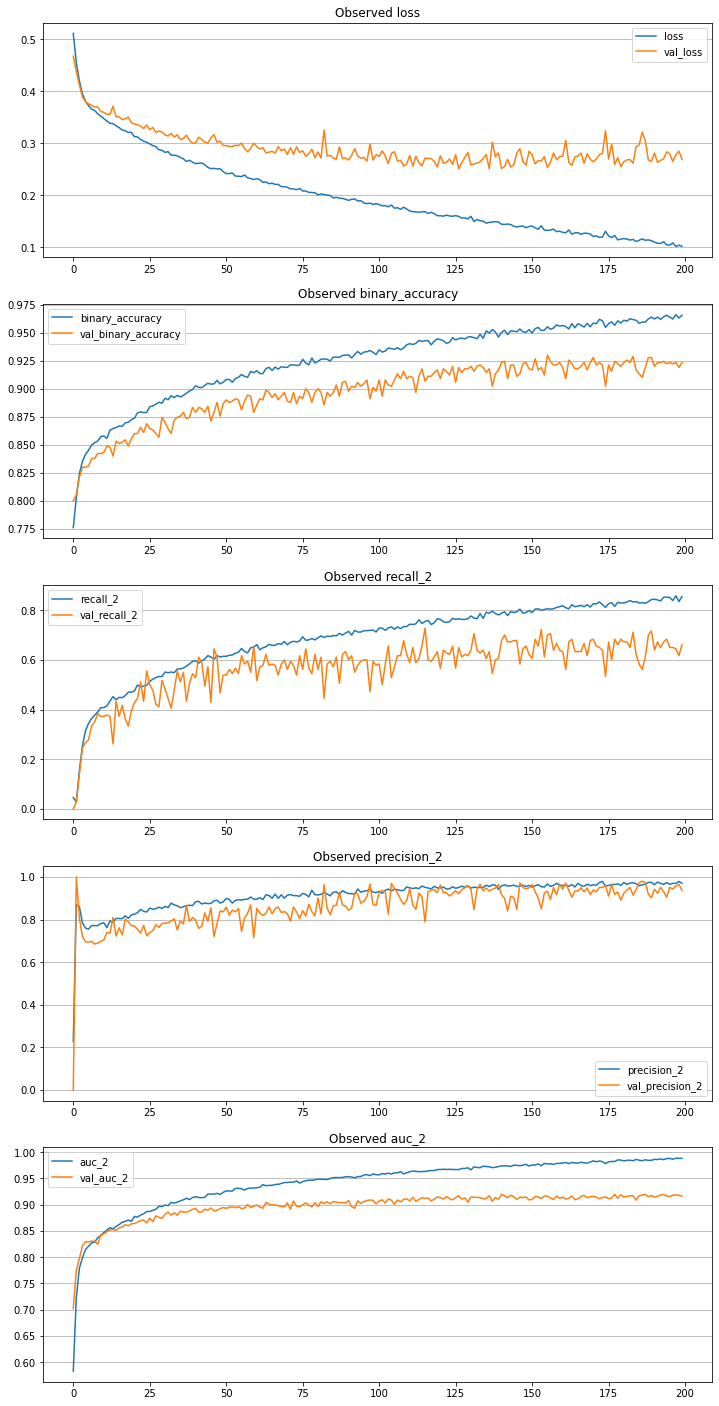

In [ ]:
show_history(History)

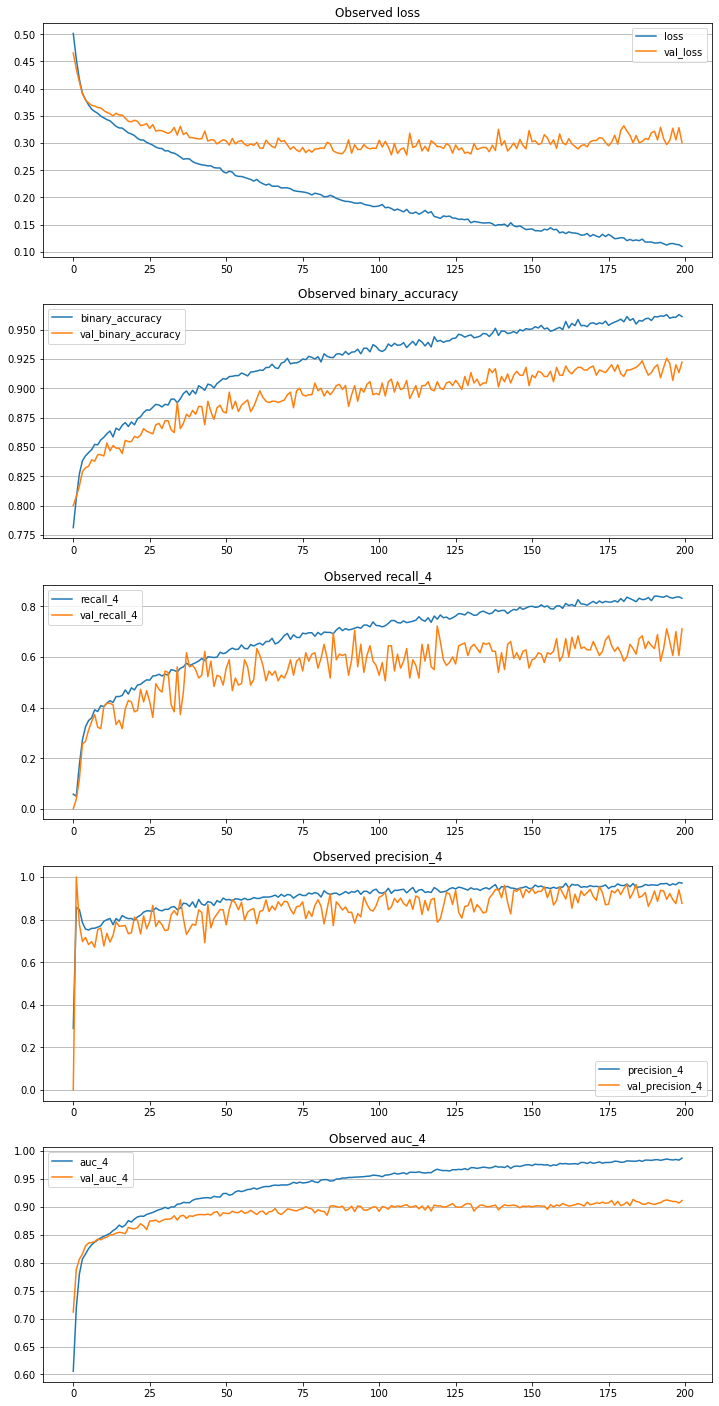

In [ ]:
show_history(history2)

In [ ]:
from sklearn.metrics import confusion_matrix
yhat = model.predict(X_test)  # it gives probabilities, has to be converted to labels (zeros or ones)

for n in range(len(yhat)):
    if yhat[n] > 0.5:
        yhat[n] = 1
    else:
        yhat[n] = 0

confusion_matrix(y_test, yhat)

array([[891,  15],
       [ 64, 155]])

In [ ]:
yhat

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

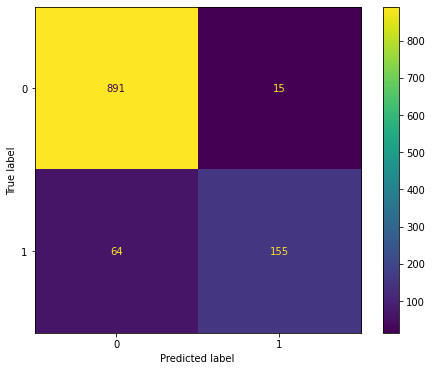

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, yhat, ax=ax)
plt.show()

In [ ]:
y_test.shape[0]

1125

In [ ]:
# FPR = FP / (FP + TP)
15 / (891 + 15)

0.016556291390728478

Now we're going to tinkle with cutoff threshold.

In [ ]:
# fpr = False Positive rate
# tpr = True Positive rate
yhat = model.predict(X_test)
yhat2 = model2.predict(X_test)
fpr , tpr , thresholds = roc_curve(y_test , yhat2)

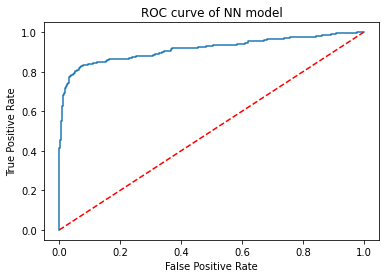

In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  #plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve of NN model')
  plt.plot([0, 1], [0, 1], "r--");  # the random benchmark we need to add manually  
  plt.show()    
  
plot_roc_curve (fpr,tpr)

In [ ]:
# get the best threshold for the NN model
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold NN model=%f' % (best_thresh))

# Last model -> Best Threshold NN model=0.167334


Best Threshold NN model=0.299682


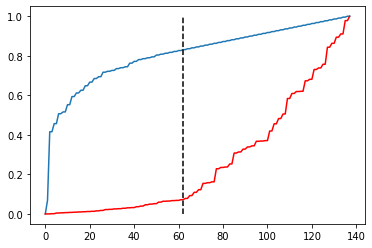

In [ ]:
plt.plot(tpr)
plt.plot(fpr, color="red")
plt.plot([ix, ix], [0, 1], "k--")

In [ ]:
print(J[50:54])
print(thresholds[50:54])

[0.74008891 0.73677765 0.74134386 0.73141008]
[0.18023789 0.17199796 0.16733408 0.15925556]


[]

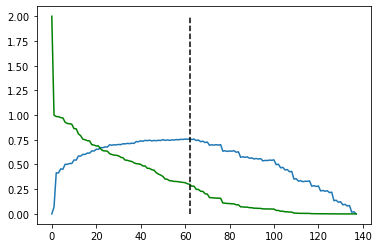

In [ ]:
plt.plot(J)
plt.plot(thresholds, color="green")
plt.plot([ix, ix], [0, 2], "k--")
plt.plot()

In [ ]:
yhat_optimal = yhat > best_thresh
yhat_suboptimal = yhat > 0.5

In [ ]:
yhat2_optimal = yhat2 > best_thresh
yhat2_suboptimal = yhat2 > 0.5

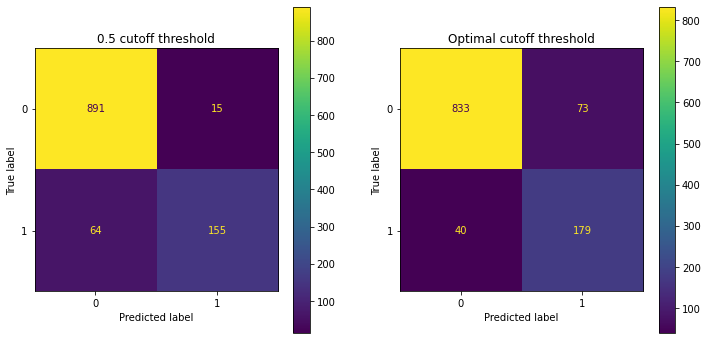

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ConfusionMatrixDisplay.from_predictions(y_test, yhat_suboptimal, ax=axs[0])
axs[0].set_title("0.5 cutoff threshold")
ConfusionMatrixDisplay.from_predictions(y_test, yhat_optimal, ax=axs[1])
axs[1].set_title("Optimal cutoff threshold")
plt.show()

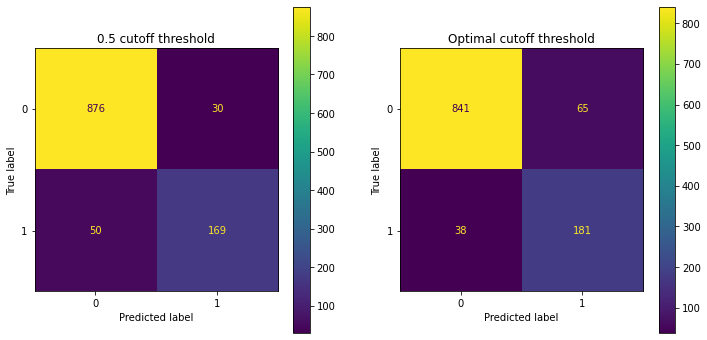

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ConfusionMatrixDisplay.from_predictions(y_test, yhat2_suboptimal, ax=axs[0])
axs[0].set_title("0.5 cutoff threshold")
ConfusionMatrixDisplay.from_predictions(y_test, yhat2_optimal, ax=axs[1])
axs[1].set_title("Optimal cutoff threshold")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a109ea11-a7da-42aa-8af0-3a0cdafc917e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>